In [2]:
import requests

In [2]:
Response = requests.get('https://www.flipkart.com/mobiles/mi~brand/pr?sid=tyy%2C4io&otracker=nmenu_sub_Electronics_0_Mi')

In [3]:
from bs4 import BeautifulSoup


In [4]:
soup = BeautifulSoup(Response.text , 'html')

In [5]:
soup

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.8dd48d.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e4e719.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:sit

In [6]:
phones = soup.find_all('div', class_="cPHDOP col-12-12")
links = []
for phone in phones:
    a_tag = phone.find('a')
    if a_tag and 'href' in a_tag.attrs:
        g = a_tag['href']
        full_link = 'https://www.flipkart.com' + g if g.startswith('/') else 'https://www.flipkart.com/' + g
        if full_link == 'https://www.flipkart.com/buying-guide/mobiles?sid=tyy,4io&otracker=bg_from_browse_lhs' or full_link == 'https://www.flipkart.com/mobiles-accessories/mi~brand/pr?sid=tyy&otracker=categorytree':
            pass
        else :
            links.append(full_link)

In [7]:
links

['https://www.flipkart.com/13-pro-ceramic-black-256-gb/p/itmf14a23fa6c99f?pid=MOBGZBGWKUBE2J67&lid=LSTMOBGZBGWKUBE2J677WAD1M&marketplace=FLIPKART&store=tyy%2F4io&srno=b_1_1&otracker=nmenu_sub_Electronics_0_Mi&fm=organic&iid=e34c3378-cc8b-4a39-b89a-5884c2692485.MOBGZBGWKUBE2J67.SEARCH&ppt=None&ppn=None&ssid=14dm83kyw00000001746535271619',
 'https://www.flipkart.com/mi-11-lite-tuscany-coral-128-gb/p/itmac6203bae9394?pid=MOBG3VSKPWYGVZEC&lid=LSTMOBG3VSKPWYGVZECLIRVTU&marketplace=FLIPKART&store=tyy%2F4io&srno=b_1_2&otracker=nmenu_sub_Electronics_0_Mi&fm=organic&iid=e34c3378-cc8b-4a39-b89a-5884c2692485.MOBG3VSKPWYGVZEC.SEARCH&ppt=None&ppn=None&ssid=14dm83kyw00000001746535271619',
 'https://www.flipkart.com/redmi-note-5-pro-rose-gold-64-gb/p/itmf2fc3jyathzcq?pid=MOBF2BSG75JYZ5YW&lid=LSTMOBF2BSG75JYZ5YWRKDTAH&marketplace=FLIPKART&store=tyy%2F4io&srno=b_1_3&otracker=nmenu_sub_Electronics_0_Mi&fm=organic&iid=e34c3378-cc8b-4a39-b89a-5884c2692485.MOBF2BSG75JYZ5YW.SEARCH&ppt=None&ppn=None&ssid=14d

In [8]:
import re
phones = soup.find_all('div', class_="cPHDOP col-12-12")

for phone in phones:
    sdf = phone.select_one('ul.G4BRas')
    if not sdf:
        continue

    specs = sdf.find_all('li')
    data = {
        "RAM": None,
        "ROM": None,
        "Display": None,
        "Camera": None,
        "Battery": None,
        "Processor": None,
        "Warranty": None
    }

    for spec in specs:
        text = spec.get_text()

        if "RAM" in text and "ROM" in text:
            match = re.search(r"(\d+\s*GB)\s*RAM\s*\|\s*(\d+\s*GB)", text)
            if match:
                data["RAM"] = match.group(1)
                data["ROM"] = match.group(2)

        elif "Display" in text:
            data["Display"] = text

        elif "Camera" in text:
            data["Camera"] = text

        elif "Battery" in text:
            data["Battery"] = text

        elif "Processor" in text:
            data["Processor"] = text

        elif "Warranty" in text:
            data["Warranty"] = text

    print(data)

{'RAM': '12 GB', 'ROM': '256 GB', 'Display': '17.09 cm (6.73 inch) Display', 'Camera': '50MP Rear Camera', 'Battery': '4820 mAh Battery', 'Processor': None, 'Warranty': None}
{'RAM': '6 GB', 'ROM': '128 GB', 'Display': '16.64 cm (6.55 inch) Full HD+ Display', 'Camera': '64MP + 8MP + 5MP | 16MP Front Camera', 'Battery': '4250 mAh Li-Polymer Battery', 'Processor': 'Qualcomm Snapdragon 732G Processor', 'Warranty': '1 Year Manufacturer Warranty for Handset and 6 Months Warranty for In the Box Accessories'}
{'RAM': '4 GB', 'ROM': '64 GB', 'Display': '15.21 cm (5.99 inch) Full HD+ Display', 'Camera': '12MP + 5MP | 20MP Front Camera', 'Battery': '4000 mAh Li Polymer Battery', 'Processor': 'Qualcomm Snapdragon 636 Processor', 'Warranty': 'Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories'}
{'RAM': '4 GB', 'ROM': '64 GB', 'Display': '16.0 cm (6.3 inch) Full HD+ Display', 'Camera': '12MP + 2MP | 13MP Front Camera', 'Battery': '4000 mAh Li-polymer Battery', 'Processor': '

In [9]:
for phone in phones:
    prices = phone.find('div', class_='Nx9bqj _4b5DiR')
    if prices:
        print(prices.get_text())
    else:
        pass

₹49,880
₹13,999
₹14,999
₹8,159
₹6,299
₹17,999
₹12,999
₹10,499
₹6,070
₹15,999
₹16,999
₹16,999
₹25,999
₹6,999
₹16,999
₹5,999
₹38,999
₹7,790
₹36,999
₹10,899
₹11,999
₹9,990
₹5,799
₹14,999


In [10]:
for phone in phones:
    discount = phone.find('div', class_='UkUFwK')
    if discount:
        print(discount.find('span').get_text())
    else:
        print('none')

none
none
44% off
44% off
none
49% off
10% off
none
none
none
19% off
none
none
none
35% off
none
none
none
35% off
35% off
32% off
46% off
none
28% off
3% off
none
none
none
44% off
none


In [11]:
import requests
from bs4 import BeautifulSoup
import re
import csv
import time

HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36'
}

BASE_URLS = [
    "https://www.flipkart.com/search?q=realme+narzo&sid=tyy%2C4io&page=",
    "https://www.flipkart.com/mobiles/mi~brand/pr?sid=tyy,4io&page=",
    "https://www.flipkart.com/samsung-mobile-store?otracker=nmenu_sub_Electronics_0_Samsung&page=",
    "https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p[]=facets.brand%255B%255D%3DInfinix&page=",
    "https://www.flipkart.com/search?q=apple+mobiles&sid=tyy%2C4io&page=",
    "https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p[]=facets.brand%255B%255D%3DVivo&page=",
    "https://www.flipkart.com/search?p[]=facets.brand%255B%255D%3DHonor&sid=tyy%2F4io&page=",
    "https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p[]=facets.brand%255B%255D%3DAsus&page=",
    "https://www.flipkart.com/search?q=poco+x2&sid=tyy%2C4io&page=",
    "https://www.flipkart.com/search?q=motorola%20mobiles&page="
]

FIELDNAMES = [
    "Phone Name", "Free Delivery (Exact Match)", "Free Delivery (Partial Match)",
    "Price", "RAM", "ROM", "Display", "Camera", "Battery", "Processor", "Warranty"
]


def parse_specs(specs_list):
    """Extract specific attributes from the spec list"""
    data = dict.fromkeys(FIELDNAMES[4:], None)
    for spec in specs_list:
        text = spec.get_text()
        if "RAM" in text and "ROM" in text:
            match = re.search(r"(\d+\s*GB)\s*RAM\s*\|\s*(\d+\s*GB)", text)
            if match:
                data["RAM"], data["ROM"] = match.groups()
        elif "Display" in text:
            data["Display"] = text
        elif "Camera" in text:
            data["Camera"] = text
        elif "Battery" in text:
            data["Battery"] = text
        elif "Processor" in text:
            data["Processor"] = text
        elif "Warranty" in text:
            data["Warranty"] = text
    return data


def extract_phone_data(phone):
    """Extract information from a single phone block"""
    row = {}

    name = phone.find('div', class_='KzDlHZ')
    row["Phone Name"] = name.get_text(strip=True) if name else "Unknown"

    delivery_exact = phone.find('div', class_='yiggsN O5Fpg8')
    delivery_partial = phone.find('div', class_='yiggsN')
    row["Free Delivery (Exact Match)"] = 'Yes' if delivery_exact else 'No'
    row["Free Delivery (Partial Match)"] = 'Yes' if delivery_partial else 'No'

    price = phone.find('div', class_='Nx9bqj _4b5DiR')
    row["Price"] = price.get_text(strip=True) if price else "N/A"

    spec_list = phone.select_one('ul.G4BRas')
    if spec_list:
        specs = spec_list.find_all('li')
        row.update(parse_specs(specs))

    return row


def scrape_page(base_url, writer):
    """Scrape pages until no products are found"""
    page = 1
    while True:
        url = base_url + str(page)
        try:
            response = requests.get(url, headers=HEADERS, timeout=10)
            if response.status_code != 200:
                break

            soup = BeautifulSoup(response.text, 'html.parser')
            phones = soup.find_all('div', class_="cPHDOP col-12-12")
            if not phones:
                break

            for phone in phones:
                row = extract_phone_data(phone)
                writer.writerow(row)

            print(f"✅ Scraped Page {page} from {base_url[:50]}...")
            time.sleep(2)
            page += 1

        except Exception as e:
            print(f"⚠️ Error on page {page}: {e}")
            time.sleep(5)
            break


def main():
    with open('realme_narzo_data.csv', mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=FIELDNAMES)
        writer.writeheader()

        for base_url in BASE_URLS:
            print(f"🔍 Starting scrape for: {base_url[:60]}...")
            scrape_page(base_url, writer)


if __name__ == "__main__":
    main()
    
# this is only the based way of scraping yet since the server is returning 503 and 529
# responses i have to relyon other method

no
no
yess
yess
no
yess
yess
yess
yess
no
yess
no
no
no
yess
no
no
no
yess
yess
yess
yess
no
yess
yess
no
no
no
no
no


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
import re
import csv
import time

# Set up Chrome WebDriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Optional: run in headless mode
options.add_argument('--disable-gpu')
options.add_argument("--window-size=1920,1080")
options.add_argument('--no-sandbox')
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36")
service = Service()  # You can specify path to chromedriver if needed
driver = webdriver.Chrome(service=service, options=options)

BASE_URLS = [
    "https://www.flipkart.com/mobiles/mi~brand/pr?sid=tyy,4io&page=",
    "https://www.flipkart.com/samsung-mobile-store?otracker=nmenu_sub_Electronics_0_Samsung&page=",
    "https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p[]=facets.brand%255B%255D%3DInfinix&page=",
    "https://www.flipkart.com/search?q=apple+mobiles&sid=tyy%2C4io&page=",
    "https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p[]=facets.brand%255B%255D%3DVivo&page=",
    "https://www.flipkart.com/search?p[]=facets.brand%255B%255D%3DHonor&sid=tyy%2F4io&page=",
    "https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p[]=facets.brand%255B%255D%3DAsus&page=",
    "https://www.flipkart.com/search?q=poco+x2&sid=tyy%2C4io&page=",
    "https://www.flipkart.com/search?q=motorola%20mobiles&page="
]

FIELDNAMES = [
    "Phone Name", "Free Delivery (Exact Match)", "Free Delivery (Partial Match)",
    "Price", "RAM", "ROM", "Display", "Camera", "Battery", "Processor", "Warranty"
]


def parse_specs(specs_texts):
    data = dict.fromkeys(FIELDNAMES[4:], None)
    for text in specs_texts:
        if "RAM" in text and "ROM" in text:
            match = re.search(r"(\d+\s*GB)\s*RAM\s*\|\s*(\d+\s*GB)", text)
            if match:
                data["RAM"], data["ROM"] = match.groups()
        elif "Display" in text:
            data["Display"] = text
        elif "Camera" in text:
            data["Camera"] = text
        elif "Battery" in text:
            data["Battery"] = text
        elif "Processor" in text:
            data["Processor"] = text
        elif "Warranty" in text:
            data["Warranty"] = text
    return data


def extract_phone_data(phone):
    row = {}

    try:
        name = phone.find_element(By.CLASS_NAME, 'KzDlHZ')
        row["Phone Name"] = name.text.strip()
    except NoSuchElementException:
        row["Phone Name"] = "Unknown"

    try:
        phone.find_element(By.CLASS_NAME, 'yiggsN.O5Fpg8')
        row["Free Delivery (Exact Match)"] = 'Yes'
    except NoSuchElementException:
        row["Free Delivery (Exact Match)"] = 'No'

    try:
        phone.find_element(By.CLASS_NAME, 'yiggsN')
        row["Free Delivery (Partial Match)"] = 'Yes'
    except NoSuchElementException:
        row["Free Delivery (Partial Match)"] = 'No'

    try:
        price = phone.find_element(By.CLASS_NAME, 'Nx9bqj._4b5DiR')
        row["Price"] = price.text.strip()
    except NoSuchElementException:
        row["Price"] = "N/A"

    try:
        spec_list = phone.find_element(By.CSS_SELECTOR, 'ul.G4BRas')
        specs = [li.text for li in spec_list.find_elements(By.TAG_NAME, 'li')]
        row.update(parse_specs(specs))
    except NoSuchElementException:
        pass

    return row


def scrape_page(base_url, writer):
    page = 1
    while True:
        url = base_url + str(page)
        try:
            driver.get(url)
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, "cPHDOP"))
            )

            phones = driver.find_elements(By.CLASS_NAME, "cPHDOP")
            if not phones:
                break

            for phone in phones:
                row = extract_phone_data(phone)
                writer.writerow(row)

            print(f"✅ Scraped Page {page} from {base_url[:50]}...")
            time.sleep(2)
            page += 1

        except TimeoutException:
            print(f"⏳ Timeout on page {page}, stopping.")
            break
        except Exception as e:
            print(f"⚠️ Error on page {page}: {e}")
            break


def main():
    with open('realme_narzo_data.csv', mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=FIELDNAMES)
        writer.writeheader()

        for base_url in BASE_URLS:
            print(f"🔍 Starting scrape for: {base_url[:60]}...")
            scrape_page(base_url, writer)

    driver.quit()


if __name__ == "__main__":
    main()


In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('realme_narzo_data.csv')

In [5]:
df.head(20)

,Phone Name,Free Delivery (Exact Match),Free Delivery (Partial Match),Price,RAM,ROM,Display,Camera,Battery,Processor,Warranty
0,Unknown,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Unknown,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"realme Narzo N61 (Vyage Blue, 64 GB)",Yes,Yes,"₹7,338",4 GB,64 GB,17.12 cm (6.74 inch) Display,32MP Rear Camera,5000 mAh Battery,NaN,NaN
3,"realme Narzo N65 5G (Deep Green, 128 GB)",Yes,Yes,"₹12,990",4 GB,128 GB,16.94 cm (6.67 inch) Display,50MP Rear Camera,5000 mAh Battery,NaN,NaN
4,"realme Narzo N61 (Voyage Blue, 128 GB)",Yes,Yes,"₹8,831",6 GB,128 GB,17.12 cm (6.74 inch) Display,32MP Rear Camera,5000 mAh Battery,NaN,NaN
5,"realme NARZO N65 5G (AMBER GOLD, 128 GB)",Yes,Yes,"₹11,499",4 GB,128 GB,16.94 cm (6.67 inch) Display,50MP Rear Camera,5000 mAh Battery,NaN,NaN
6,"realme Narzo N65 5G (Ambr Gold, 128 GB)",Yes,Yes,"₹11,900",6 GB,128 GB,16.94 cm (6.67 inch) Display,50MP Rear Camera,5000 mAh Battery,NaN,NaN
7,"realme Narzo N61 (Marble Black, 64 GB)",Yes,Yes,"₹7,510",4 GB,64 GB,17.12 cm (6.74 inch) Display,32MP Rear Camera,5000 mAh Battery,NaN,NaN
8,"realme Narzo N65 5G (Amber Gold, 128 GB)",Yes,Yes,"₹11,179",4 GB,128 GB,16.94 cm (6.67 inch) Display,50MP Rear Camera,5000 mAh Battery,NaN,NaN
9,"realme Narzo N61 (Marble Black, 128 GB)",Yes,Yes,"₹8,895",6 GB,128 GB,17.12 cm (6.74 inch) Display,32MP Rear Camera,5000 mAh Battery,NaN,NaN


In [8]:
# Clean the 'Price' column safely
df_cleaned['Price'] = (
    df_cleaned['Price']
    .replace({'₹': '', ',': ''}, regex=True)
    .apply(lambda x: str(x).strip())  # Ensure it's a clean string
)

# Convert to numeric with coercion to handle bad data
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')

# Drop rows with missing prices
df_cleaned.dropna(subset=['Price(₹)'], inplace=True)

# Convert to integer after dropping NaNs
df_cleaned['Price'] = df_cleaned['Price'].astype(int)

In [10]:
df_cleaned

,Phone Name,Free Delivery (Exact Match),Free Delivery (Partial Match),Price,RAM,ROM,Display,Camera,Battery,Processor,Warranty
2,"realme Narzo N61 (Vyage Blue, 64 GB)",Yes,Yes,7338,4 GB,64 GB,17.12 cm (6.74 inch) Display,32MP Rear Camera,5000 mAh Battery,NaN,NaN
3,"realme Narzo N65 5G (Deep Green, 128 GB)",Yes,Yes,12990,4 GB,128 GB,16.94 cm (6.67 inch) Display,50MP Rear Camera,5000 mAh Battery,NaN,NaN
4,"realme Narzo N61 (Voyage Blue, 128 GB)",Yes,Yes,8831,6 GB,128 GB,17.12 cm (6.74 inch) Display,32MP Rear Camera,5000 mAh Battery,NaN,NaN
5,"realme NARZO N65 5G (AMBER GOLD, 128 GB)",Yes,Yes,11499,4 GB,128 GB,16.94 cm (6.67 inch) Display,50MP Rear Camera,5000 mAh Battery,NaN,NaN
6,"realme Narzo N65 5G (Ambr Gold, 128 GB)",Yes,Yes,11900,6 GB,128 GB,16.94 cm (6.67 inch) Display,50MP Rear Camera,5000 mAh Battery,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
937,"Mi 4i (Grey, 32 GB)",No,No,14999,2 GB,32 GB,12.7 cm (5 inch) Full HD Display,13MP Rear Camera | 5MP Front Camera,3120 mAh Li-ion Polymer Battery,2nd-gen Snapdragon 615 64-bit octa-core Processor,Brand Warranty of 1 Year Available for Mobile ...
938,"4i (Yellow, 16 GB)",Yes,Yes,12999,2 GB,16 GB,12.7 cm (5 inch) Full HD Display,13MP Rear Camera | 5MP Front Camera,3030 mAh Li-ion Polymer Battery,2nd-gen Snapdragon 615 64-bit octa-core Processor,Brand Warranty of 1 Year Available for Mobile ...
939,"(Refurbished) Mi 11i 5G (Camo Green, 128 GB)",Yes,Yes,13999,8 GB,128 GB,6.67 inch Full HD+ AMOLED Display,108MP Rear Camera | 16MP Front Camera,5160 mAh Battery,Mediatek Dimensity 920 Processor,NaN
940,"(Refurbished) Mi Mi 11X (LUNAR WHITE, 128 GB)",Yes,Yes,15499,8 GB,128 GB,6.67 inch Display,48MP Rear Camera,4520 mAh Battery,NaN,NaN


In [11]:
# Check where NaNs exist
df_cleaned.isna().sum()


Phone Name                         0
Free Delivery (Exact Match)        0
Free Delivery (Partial Match)      0
Price                              0
RAM                                2
ROM                                2
Display                            0
Camera                             0
Battery                            0
Processor                        165
Warranty                         128
dtype: int64

In [12]:
df_cleaned.dropna(inplace=True)


In [13]:
df_cleaned.dropna(subset=['Price'], inplace=True)


In [15]:
df_cleaned['Processor'].fillna('Unknown', inplace=True)
df_cleaned['Price'] = df_cleaned['Price'].fillna(df_cleaned['Price'].mean())
df_cleaned['Warranty'] = df_cleaned['Warranty'].fillna(df_cleaned['Warranty'].mode()[0])


In [16]:
df_cleaned['Has_Missing'] = df_cleaned.isnull().any(axis=1)


In [17]:
missing_rows = df_cleaned[df_cleaned[['Processor', 'Warranty']].isnull().any(axis=1)]


In [18]:
df_cleaned['Price'] = df_cleaned.groupby('RAM')['Price'].transform(lambda x: x.fillna(x.mean()))


In [23]:
# now time for some visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: convert ROM and Camera to numeric if needed
df_cleaned['ROM_GB'] = df_cleaned['ROM'].str.extract(r'(\d+)').astype(float)
df_cleaned['Camera_MP'] = df_cleaned['Camera'].str.extract(r'(\d+)').astype(float)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned,
    x='RAM_GB',
    y='Price',
    size='ROM_GB',
    hue='Camera_MP',
    palette='coolwarm',
    sizes=(50, 200),
    legend='brief'
)

plt.title('📱 Flipkart Phone Prices by RAM, ROM, and Camera MP')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (₹)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipykernel_1119/2327400605.py:17: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from current font.
  plt.tight_layout()
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


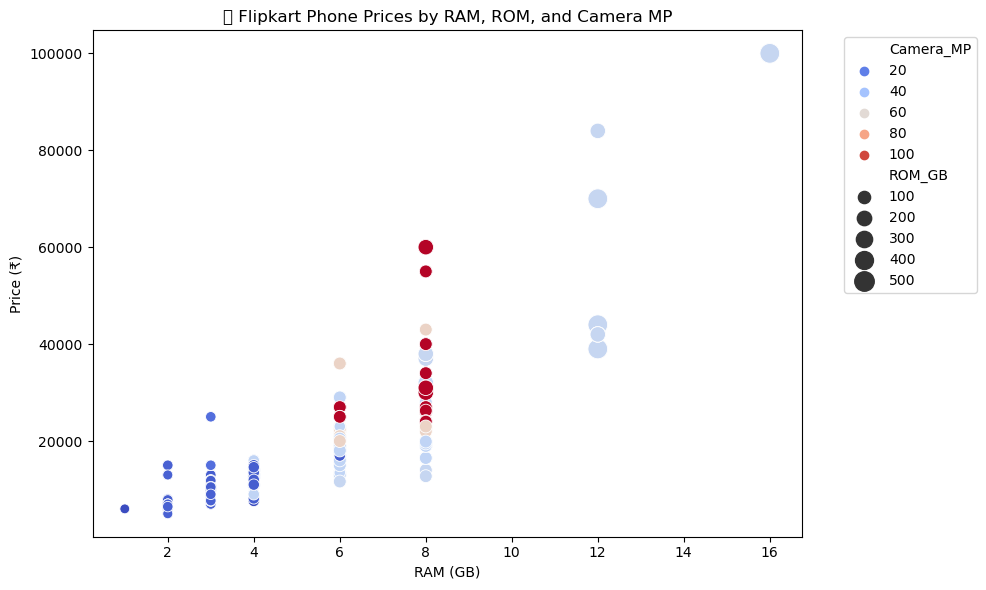

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned,
    x='RAM_GB',
    y='Price',
    size='ROM_GB',
    hue='Camera_MP',
    palette='coolwarm',
    sizes=(50, 200),
    legend='brief'
)

plt.title('📱 Flipkart Phone Prices by RAM, ROM, and Camera MP')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (₹)')
plt.tight_layout()
plt.show()
